# Use Of Word Net Lemmatizer And Count Vectorizer

In [8]:
import nltk
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.metrics as m
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [9]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
df=pd.read_csv('/content/drive/MyDrive/DataSets/spam.csv',encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df['v2'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5572 entries, 0 to 5571
Series name: v2
Non-Null Count  Dtype 
--------------  ----- 
5572 non-null   object
dtypes: object(1)
memory usage: 43.7+ KB


In [13]:
df['v1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5572 entries, 0 to 5571
Series name: v1
Non-Null Count  Dtype 
--------------  ----- 
5572 non-null   object
dtypes: object(1)
memory usage: 43.7+ KB


In [14]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [15]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

# Label Encoding

This is giving the labels spam and ham a categorical label of either 0 or 1

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])

In [17]:
df['label'].value_counts()

,count
label,
0,4825
1,747


In [18]:
import re

In [19]:
len(set(stopwords.words('english')))

198

In [20]:
df['text']

,text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [21]:
lemma=WordNetLemmatizer()


In [22]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [23]:
cleaned_text=[]
for text in df['text']:
  senti=re.sub('[^A-Za-z]',' ',text)
  senti=senti.lower()
  words=word_tokenize(senti)
  word=[lemma.lemmatize(i) for i in words if i not in stopwords.words('english')]
  senti=' '.join(word)
  cleaned_text.append(senti)


In [24]:
cleaned_text

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gon na home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw

# Count Vectorizer

This turns words into vectors for computational understanding based on each term appearance/frequency

In [25]:
cv=CountVectorizer(max_features=5000)

In [26]:
features=cv.fit_transform(cleaned_text)

In [27]:
vectorized_features=features.toarray()

In [28]:
vectorized_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
#This displays the unique names
cv.get_feature_names_out()

array(['aah', 'aathi', 'ab', ..., 'zf', 'zindgi', 'zoe'], dtype=object)

In [30]:
len(cv.get_feature_names_out())

5000

## Implementation of SMOTE(synthetic minority oversampling technique)

In [31]:
!pip install imbalanced-Learn

In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


vectorized_features_train,vectorized_features_test,label_train,label_test=train_test_split(vectorized_features,df['label'],test_size=0.2,random_state=7)
smote = SMOTE(random_state=7)
X_train_smote, y_train_smote = smote.fit_resample(vectorized_features_train, label_train)


# Machine Learning Model Building


---

The ML Models Used Include:

1. Multinomial Naive Bayes  

2.   Logistic Regression
3.   Support Vector Machines
2.   Decision Tree Classifier



# Multinomial Naive Bayes

*   This Algorithm is used in text classification where word frequency is taken and its probability is calculated according to its classification
*   An Assumption is made that evey word is independent despite the context of the given text



In [33]:
model=MultinomialNB()
model.fit(X_train_smote,y_train_smote)
y_pred=model.predict(vectorized_features_test)


In [34]:
accuracy_mnb=m.accuracy_score(label_test,y_pred)

In [35]:
#Confusion Matrix
cm=m.confusion_matrix(label_test,y_pred)
cm


array([[950,  20],
       [  9, 136]])

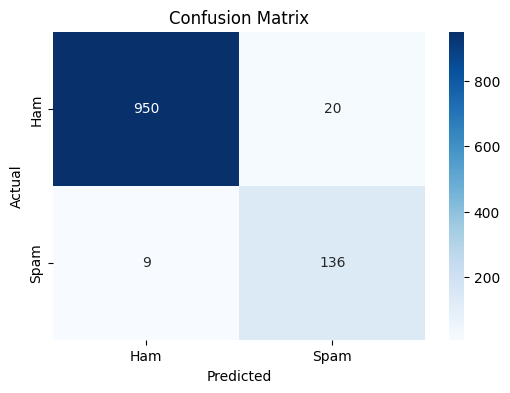

In [36]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Support Vector Machines


In [37]:
model=SVC(kernel='linear')
model.fit(X_train_smote,y_train_smote)


SVC(kernel='linear')

In [38]:
y_pred=model.predict(vectorized_features_test)

In [39]:
accuracy_svm=m.accuracy_score(label_test,y_pred)

In [41]:
from sklearn.metrics import confusion_matrix
cm_svm=confusion_matrix(label_test,y_pred)
cm_svm

array([[869, 101],
       [ 11, 134]])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

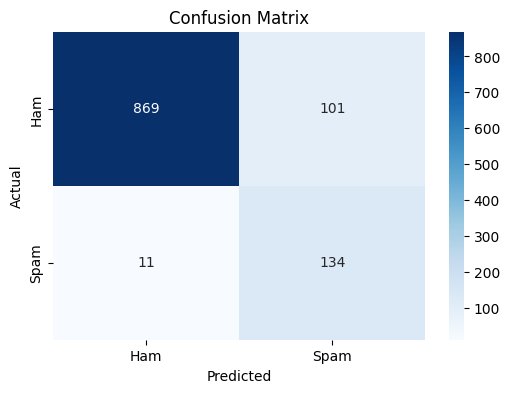

In [42]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt

# Logistic Regression

In [43]:
model=LogisticRegression()
model.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [45]:
y_pred=model.predict(vectorized_features_test)

In [46]:
accuracy_lr=m.accuracy_score(label_test,y_pred)

In [47]:
cm_lr=confusion_matrix(label_test,y_pred)
cm_lr

array([[901,  69],
       [  9, 136]])

Text(45.722222222222214, 0.5, 'Actual')

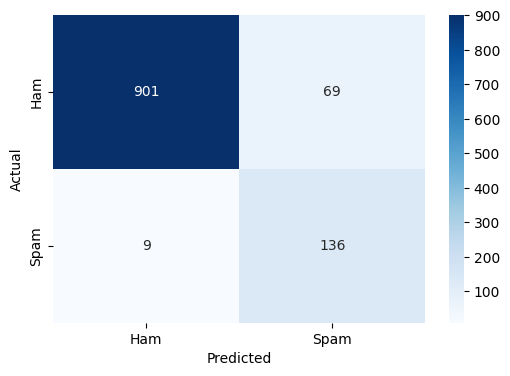

In [48]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

# DecisionTree Classifier

In [49]:
model=DecisionTreeClassifier()
model.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier()

In [50]:
y_pred=model.predict(vectorized_features_test)

In [51]:
accuracy_dt=m.accuracy_score(label_test,y_pred)

In [52]:
cm_dt=confusion_matrix(label_test,y_pred)
cm_dt

array([[850, 120],
       [ 19, 126]])

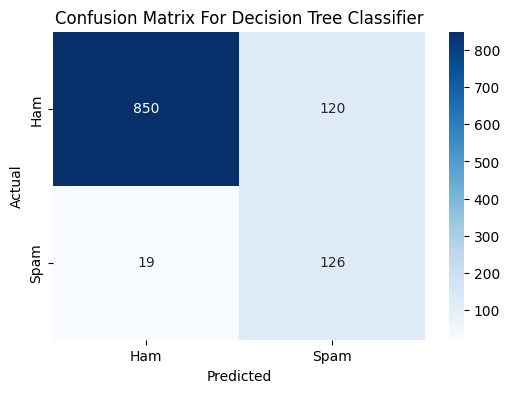

In [53]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For Decision Tree Classifier')
plt.show()

In [54]:
results = [
    ("Logistic Regression", accuracy_lr),
    ("Naive Bayes", accuracy_mnb),
    ("SVM", accuracy_svm),
    ("Decision Tree", accuracy_dt),
]

# Convert to DataFrame for display
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)


In [55]:
results_df.head(5)

,Model,Accuracy
1,Naive Bayes,0.973991
0,Logistic Regression,0.930045
2,SVM,0.899552
3,Decision Tree,0.875336
